# Probabilistic models for linear regression

Probabilistic models adds an element of “uncertainty” to the linear regression. For example, if linear regression predicts thing, like price of a house, based on another, like size of homes, rooms, and exc., probabilistic models will add probability to this predicts, like “there is a probability that the price will be like this”. Consider a regression problem with dataset $\mathcal D = \{(\boldsymbol x_i, y_i)\}_{i=1}^n$, $y_i\in\mathbb R$. The probabilistic model for the linear regression model assumes that

$$
    y_i = \boldsymbol x_i^\top \boldsymbol w + \varepsilon_i,
$$

where $\varepsilon_i$ is some random noise.


   Main difference, that we don’t only predict, but we also evaluate, how confident we are on this predictions.

>We need probablistic models, because we don’t 100% confident about our prediction. This models helps us to understand and explain the uncentainties in our predictions.

### Differences: 

### 1. Uncertainty
- **Linear Regression:** Gives specific number as prediction 
- **Probabilistic Models:** Gives a range of possible values and the probability that the actual value will be in this range.

### 2. Results
- **Linear Regression:** According to calculations, the house price will be $x$
- **Probabilistic Models:** Based on calculations, there is 95% chance that the house price will be between $x$ and $y$

<br>

Probabilistic models are usefull in situations where we have uncertainty in datasets, we need to understand how much we confident about predictions.



In [1]:
from jupyterquiz import display_quiz
import json
from base64 import b64encode

def get_spanned_encoded_q(q, q_name):
    byte_code = b64encode(bytes(json.dumps(q), 'utf8'))
    return f'<span style="display:none" id="{q_name}">{byte_code.decode()}</span>'

In [2]:
file = open('./lin_reg_files/1.json','r').read()
get_spanned_encoded_q(file, "qka")

'<span style="display:none" id="qka">IlsgICAgICAgIHtcbiAgICBcInF1ZXN0aW9uXCI6IFwiV2hhdCBpcyB0aGUgYXNzdW1wdGlvbiBhYm91dCB0aGUgZGlzdHJpYnV0aW9uIG9mIGVycm9ycyBpbiBwcm9iYWJpbGlzdGljIGxpbmVhciByZWdyZXNzaW9uP1wiLFxuICAgIFwidHlwZVwiOiBcIm11bHRpcGxlX2Nob2ljZVwiLFxuICAgIFwiYW5zd2Vyc1wiOiBbXG4gICAgICAgIHtcImNvZGVcIjogXCJFcnJvcnMgYXJlIHVuaWZvcm1seSBkaXN0cmlidXRlZFwiLCBcImNvcnJlY3RcIjogZmFsc2V9LFxuICAgICAgICB7XCJjb2RlXCI6IFwiRXJyb3JzIGZvbGxvdyBhIG5vcm1hbCBkaXN0cmlidXRpb25cIiwgXCJjb3JyZWN0XCI6IHRydWV9LFxuICAgICAgICB7XCJjb2RlXCI6IFwiRXJyb3JzIGFyZSBleHBvbmVudGlhbGx5IGRpc3RyaWJ1dGVkXCIsIFwiY29ycmVjdFwiOiBmYWxzZX0sXG4gICAgICAgIHtcImNvZGVcIjogXCJFcnJvcnMgaGF2ZSBhIGJpbm9taWFsIGRpc3RyaWJ1dGlvblwiLCBcImNvcnJlY3RcIjogZmFsc2V9XG4gICAgXVxufV1cbiI=</span>'

In [3]:
display_quiz("./lin_reg_files/1.json")

<IPython.core.display.Javascript object>

## Gaussian model

In this setting the random noise is gaussian: $\varepsilon_i \sim \mathcal N (0, \sigma^2)$. Hence,

$$
    p(y_i \vert \boldsymbol x_i, \boldsymbol w) = \mathcal N(\boldsymbol x_i^\top \boldsymbol w, \sigma^2) = \frac 1{\sqrt{2\pi} \sigma} \exp\Big(-\frac{(\boldsymbol x_i^\top \boldsymbol w - y_i)^2}{2\sigma^2}\Big).
$$

**Q**. What is $\mathbb E y_i$? $\mathbb V y_i$?

A picture from [ML Handbook](https://academy.yandex.ru/handbook/ml/article/beta-pervoe-znakomstvo-s-veroyatnostnymi-modelyami#sluchajnost-kak-istochnik-nesovershenstva-modeli):

```{figure} lin_reg_gaussians.png
:align: center
```

**Q**. What is $\boldsymbol x_i$ and $\boldsymbol w$ in this picture? 

The likelihood of the dataset $\mathcal D$ is

$$
    p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w) = \prod_{i=1}^n \mathcal N(\boldsymbol x_i^\top \boldsymbol w, \sigma^2) = \frac 1{(\sqrt{2\pi}\sigma)^n}\exp\Big(-\sum\limits_{i=1}^n \frac{(\boldsymbol x_i^\top \boldsymbol w - y_i)^2}{2\sigma^2}\Big).
$$

Hence, the negative log-likelihood is

$$
    \mathrm{NLL}(\boldsymbol w) = -\log p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w)=
    \frac 1{2\sigma^2} \sum\limits_{i=1}^n (\boldsymbol x_i^\top \boldsymbol w - y_i)^2 + \frac n2\log(2\pi\sigma)^2.
$$

**Q.** How does this NLL relates to the loss function {eq}`lin-reg-loss-opt` of the linear regression model?

Thus, the optimal weights {eq}`lin-reg-solution` of the linear regression with MSE loss coincide with MLE:

$$
    \boldsymbol{\widehat w} = \arg\max\limits_{\boldsymbol w} p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w) = \arg\min\limits_{\boldsymbol w} \mathrm{NLL}(\boldsymbol w).
$$

**Q**. Let $\sigma$ be also a learnable parameter. What is MLE $\widehat \sigma^2$ for it?


### Why/Where should I use it? 

1. Gaussian Process Regression doesn't make strong assumptions about the functional form of the relationship between inputs and outputs. This can be used to your benefit when dealing with non-linear relationships in the data

2. Gaussian Process Regression can perform well with small and potentially noisy datasets. It inherently accounts for uncertainty, making it suitable for situations where the data is limited or noisy by providing estimates of uncertainty or ranges of uncertainty. 

<br>

### Better not to use IF:

1. You deal with big datasets. Gaussian Process Regression can be computationally expensive, especially as the size of the dataset increases.

2. You deal with high/relatively high precision in your data.

In [4]:
display_quiz("./lin_reg_files/2.json")

<IPython.core.display.Javascript object>

## Code Example

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact
from sklearn.model_selection import train_test_split
import mpld3
mpld3.enable_notebook()

In [6]:
from sklearn.datasets import fetch_openml

co2 = fetch_openml(data_id=41187, as_frame=True)
co2.frame.head()

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,MLO,316.1
1,1958.0,4.0,5.0,6.0,0.0,MLO,317.3
2,1958.0,4.0,12.0,4.0,0.0,MLO,317.6
3,1958.0,4.0,19.0,6.0,0.0,MLO,317.5
4,1958.0,4.0,26.0,2.0,0.0,MLO,316.4


In [7]:
co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data[["date", "co2"]].set_index("date")
co2_data.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


### Data Analysis

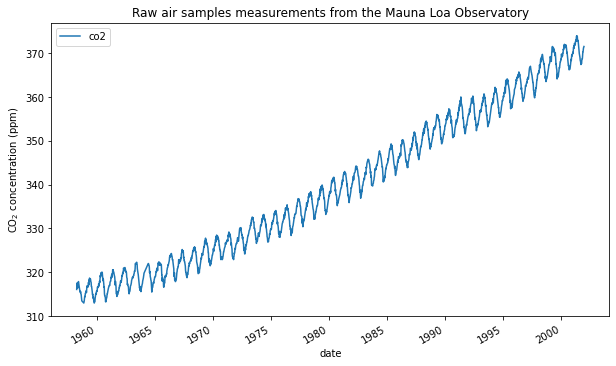

In [8]:
import matplotlib.pyplot as plt

co2_data.plot(figsize=(10,6))
plt.ylabel("CO$_2$ concentration (ppm)")
_ = plt.title("Raw air samples measurements from the Mauna Loa Observatory")


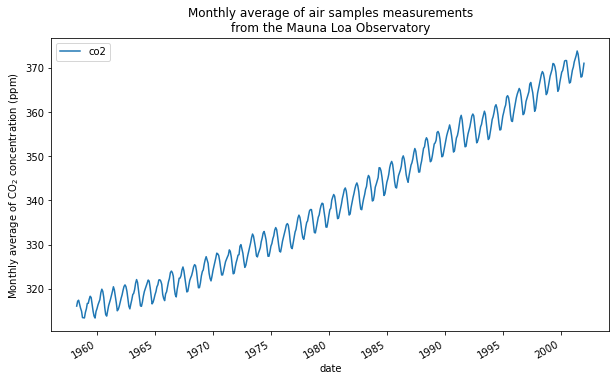

In [9]:
co2_data = co2_data.resample("M").mean().dropna(axis="index", how="any")
co2_data.plot(figsize=(10,6))
plt.ylabel("Monthly average of CO$_2$ concentration (ppm)")
_ = plt.title(
    "Monthly average of air samples measurements\nfrom the Mauna Loa Observatory"
)

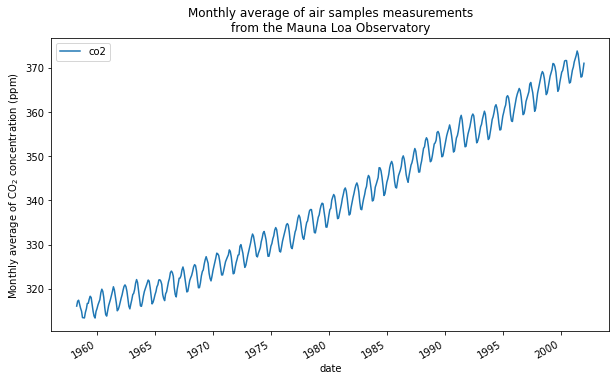

In [10]:
co2_data = co2_data.resample("M").mean().dropna(axis="index", how="any")
co2_data.plot(figsize=(10,6))
plt.ylabel("Monthly average of CO$_2$ concentration (ppm)")
_ = plt.title(
    "Monthly average of air samples measurements\nfrom the Mauna Loa Observatory"
)

In [11]:
X = (co2_data.index.year + co2_data.index.month / 12).to_numpy().reshape(-1, 1)
y = co2_data["co2"].to_numpy()

### Building Kernel for Gaussian Process Regression

In [12]:
from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)

In [13]:
from sklearn.gaussian_process.kernels import ExpSineSquared

seasonal_kernel = (
    2.0**2
    * RBF(length_scale=100.0)
    * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
)

In [14]:
from sklearn.gaussian_process.kernels import RationalQuadratic

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

In [15]:
from sklearn.gaussian_process.kernels import WhiteKernel

noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)

In [16]:
co2_kernel = (
    long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel
)
co2_kernel

50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)

### Fitting data to the regressor

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor

y_mean = y.mean()
gaussian_process = GaussianProcessRegressor(kernel=co2_kernel, normalize_y=False)
gaussian_process.fit(X, y - y_mean)

GaussianProcessRegressor(kernel=50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))

### Preparing data (X_test, y_pred +- std) for the plot

In [18]:
import datetime

import numpy as np

today = datetime.datetime.now()
current_month = today.year + today.month / 12
X_test = np.linspace(start=1958, stop=current_month, num=1_000).reshape(-1, 1)
mean_y_pred, std_y_pred = gaussian_process.predict(X_test, return_std=True)
mean_y_pred += y_mean

In [19]:
mean_y_pred, std_y_pred = gaussian_process.predict(X_test, return_std=True)
mean_y_pred += y_mean

## Plotting results

Text(0.5, 1.0, 'Monthly average of air samples measurements\nfrom the Mauna Loa Observatory')

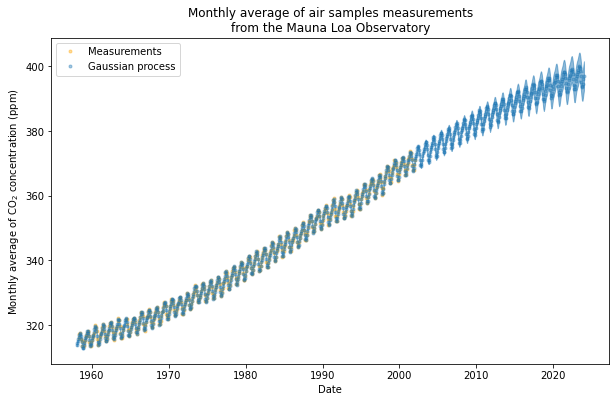

In [20]:
plt.figure(figsize=(10,6))
plt.plot(X, y, color="orange", linestyle="", label="Measurements", alpha=0.4, marker=".")
plt.plot(X_test, mean_y_pred, linestyle="", color="tab:blue",  marker=".", alpha=0.4, label="Gaussian process")
plt.fill_between(
    X_test.ravel(),
    mean_y_pred - std_y_pred,
    mean_y_pred + std_y_pred,
    color="tab:blue",
    alpha=0.5,
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Monthly average of CO$_2$ concentration (ppm)")
plt.title("Monthly average of air samples measurements\nfrom the Mauna Loa Observatory")

## Laplacian model

Laplacian Model is particularly useful in situations where sparse solutions are expected, with many zero or near-zero coefficients. The Laplacian model is also preferred when robustness to outliers is crucial, It is also well-suited for variable selection, automatically assigning more zero weights to irrelevant features. On top of that, the Laplacian model can be more flexible in accommodating different error patterns.


Now suppose that our loss function is MAE. Then 

$$  
    \boldsymbol{\widehat w} = \arg\min\limits_{\boldsymbol w} \sum\limits_{i=1}^n \vert \boldsymbol x_i^\top \boldsymbol w - y_i\vert = \arg\max\limits_{\boldsymbol w} \Big(-\sum\limits_{i=1}^n \vert \boldsymbol x_i^\top \boldsymbol w - y_i\vert\Big)
$$

Which probabilistic model will give

$$
    \mathrm{NLL}(\boldsymbol w) = -\frac 1b\sum\limits_{i=1}^n \vert \boldsymbol x_i^\top \boldsymbol w - y_i\vert?
$$

Well, then likelihood should be

$$
    p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w) = \exp\Big(-\frac 1b\sum\limits_{i=1}^n \vert\boldsymbol x_i^\top \boldsymbol w - y_i\vert\Big) = \prod\limits_{i=1}^n \exp\Big(-\frac{\vert\boldsymbol x_i^\top \boldsymbol w - y_i\vert} b\Big).
$$

Hence,

$$
    p(y_i \vert \boldsymbol x_i, \boldsymbol w) = \exp\Big(-\frac{\vert\boldsymbol x_i^\top \boldsymbol w - y_i\vert}b\Big),
$$

and

$$
    y_i  \sim \mathrm{Laplace}(\boldsymbol x_i^\top \boldsymbol w, b).
$$


In [21]:
display_quiz("./lin_reg_files/3.json")

<IPython.core.display.Javascript object>

## Bayesian linear regression

Using priors in the linear regression has several purposes. For instance, They prevent overfitting and help control the complexity of the learned function. Gaussian priors promote smoothness, making the model less sensitive to noise in the training data. Laplacian priors, by encouraging sparsity, can result in models that are more interpretable, especially in cases where the underlying process exhibits sharp changes or discontinuities.

### Gaussian prior

Let prior distribution be Gaussian:

$$
    p(\boldsymbol w) = \mathcal N(\boldsymbol 0, \tau^2\boldsymbol I).
$$

Then posterior distribution

$$
    p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) \propto
    p( \boldsymbol y \vert  \boldsymbol X, \boldsymbol w)p(\boldsymbol w)
$$

 is also Gaussian.

 ````{admonition} Example
:class: important
Let $y = ax$ be 1-d linear regression model and $p(a) = \mathcal N(0, \tau^2)$.
Find posterior $p(a \vert \boldsymbol x, \boldsymbol y)$ after observing a dataset $\{(x_i, y_i)\}_{i=1}^n$.

```{admonition} Possible answer
:class: tip, dropdown

$$
    p(a \vert \boldsymbol x, \boldsymbol y) = \mathcal N\Bigg(\frac{\boldsymbol x^\intercal\boldsymbol y}{\frac{\sigma^2}{\tau^2}+ \sum\limits_{i=1}^n x_i^2}, \frac 1{\frac 1{\tau^2} + \frac 1{\sigma^2}\sum\limits_{i=1}^n x_i^2}\Bigg)
$$
```
````


To find $\boldsymbol {\widehat w}_{\mathrm{MAP}}$, we need to maximize posterior $p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y)$. This is the same as to minimize

$$
    -\log p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) = -\log p( \boldsymbol y \vert  \boldsymbol X, \boldsymbol w) - \log p(\boldsymbol w) + \mathrm{const}.
$$

Recall that $p( \boldsymbol y \vert  \boldsymbol X, \boldsymbol w) = \mathcal N(\boldsymbol{Xw}, \sigma^2 \boldsymbol I)$. According to calculations from [ML Handbook](https://academy.yandex.ru/handbook/ml/article/beta-bajesovskij-podhod-k-ocenivaniyu#primer-linejnaya-regressiya-s-l-2-regulyarizacziej-kak-model-s-gaussovskim-apriornym-raspredeleniem-na-vesa)

$$
    -\log p( \boldsymbol y \vert  \boldsymbol X, \boldsymbol w) - \log p(\boldsymbol w)
    = \frac 1{2\sigma^2} \sum\limits_{i=1}^n (y_i -\boldsymbol x_i^\intercal \boldsymbol w)^2 + \frac 1{2\tau^2} \sum\limits_{j=1}^d w_j^2.
$$

Hence,

$$
\boldsymbol {\widehat w}_{\mathrm{MAP}} = \arg\min\limits_{\boldsymbol w}
\bigg(\sum\limits_{i=1}^n (y_i -\boldsymbol x_i^\intercal \boldsymbol w)^2 + \frac{\sigma^2}{\tau^2} \Vert \boldsymbol w \Vert_2^2\bigg).
$$

Can you recognize the objective of the {ref}`ridge regression <ridge>` with $C =  \frac{\sigma^2}{\tau^2}$? The analytical solution is

$$
    \boldsymbol {\widehat w}_{\mathrm{MAP}} = \Big(\boldsymbol X^\intercal \boldsymbol X + \frac{\sigma^2}{\tau^2}\boldsymbol I\Big)^{-1}\boldsymbol X^{\intercal}\boldsymbol y.
$$

Contnuing calculations, we can find posterior:

$$
    p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) = \mathcal N\Big(\boldsymbol {\widehat w}_{\mathrm{MAP}},\Big(\frac 1{\sigma^2}\boldsymbol X^\intercal \boldsymbol X + \frac{1}{\tau^2}\boldsymbol I\Big)^{-1} \Big).
$$

(laplace-prior)=
### Laplacian prior

Consinder the following prior: $w_1, \ldots, w_d$ are i.i.d laplacian random variables with parameter $\lambda$. Then

$$
    p(\boldsymbol w) = \prod\limits_{j=1}^d \mathrm{Laplace}(\lambda) = 
    \prod\limits_{j=1}^d \frac\lambda 2e^{-\lambda|w_j|} = \frac {\lambda^d}{2^d}
    \exp\Big(-\sum\limits_{j=1}^d\lambda|w_j|\Big).
$$

The likelihood $p( \boldsymbol y \vert  \boldsymbol X, \boldsymbol w)$ is still 
$\mathcal N(\boldsymbol{Xw}, \sigma^2 \boldsymbol I)$. Then

$$
-\log p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) = \frac 1{2\sigma^2} \sum\limits_{i=1}^n (y_i -\boldsymbol x_i^\intercal \boldsymbol w)^2 +  \lambda\sum\limits_{j=1}^d \vert w_j\vert.
$$

Hence, maximum a posteriori estimation is

$$
\boldsymbol {\widehat w}_{\mathrm{MAP}} = \arg\min\limits_{\boldsymbol w}
\Big(\Vert \boldsymbol{Xw} - \boldsymbol y\Vert_2^2 + 2\sigma^2 \lambda \Vert \boldsymbol w \Vert_1\Big).
$$

This is exactly the objective of {ref}`LASSO <lasso>`.

## An example of Gaussian process regression compared to other regression models (for reference)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Regressions_sine_demo.svg/1920px-Regressions_sine_demo.svg.png">